# Lecture 3: Code reviews, testing and advice for testing complex things

## Learning objectives:
By the end of this lecture, students should be able to:

- Perform a code review that uses inline comments and suggested code fixes
- Define the following 3 types of testing
    - unit testing
    - integration testing
    - regression testing
- Employ a workflow that optimizes accurate code
- Write unit tests for complex objects (e.g., data frames, models, plots)
- Use `pytest` and `testhat` to run a project's entire test suite
- Explain how `pytest` and `testhat` find the test functions when they are asked to run a project's entire test suite

## Code reviews using in-line comments and suggested code fixes

- In the project, you are expected to read and review eachother's code BEFORE accepting a pull request. 

- Do not expect all (or even most) pull requests to be perfect in their first submission. 

- We very often need to have a conversation to get pull requests into good shape before merging into master, and GitHub has a very nice tool we can utilize to do this: **GitHub code reviews**


<img src ="https://help.github.com/assets/images/help/commits/hover-comment-icon.gif" width=700>

*Source: <https://help.github.com/en/github/collaborating-with-issues-and-pull-requests/reviewing-proposed-changes-in-a-pull-request>*

### Demo: do a code review:

I am going to demo a code review of a pull request. I have set-up a template GitHub repository for you so that you can easily generate a pull request for you to review if you want to try this later.

#### Steps:

1. Click the green "Use this template" button in [this repository](https://github.com/ttimbers/review-my-pull-request) to obtain a copy of it for yourself (do not fork it).

2. Create a remote branch named `pr` (this will use GitHub Actions to create a pull request for you to review in this repository).

3. Click on the Pull Requests tab of your copy of the repository, click on the pull request titled "Report most accomplished pilots", and then click on "Files Changed". Next click on the `star-wars.Rmd` file. Review the file and observe the following problems with the R Markdown report that was submitted via the pull request:
  - Reasoning of the sentence on line 15
  - Incompatibility with the sentence on line 15 with the code in the code chunk named `table-of-most-accomplished-pilots`
  - Incorrect code in code chunk named `table-of-most-accomplished-pilots` (unested `film` instead of `starships`) leads to naming the wrong pilot as the most accomplished pilot on line 19
  - Incorrect code in code chunk named `table-of-most-accomplished-pilots` (unested `film` instead of `starships`) leads to the use of the wrong character's picture in the image that is sourced in the code chunk named `top-pilot` (it should be a picture of Obi-Wan Kenobi, you could use this URL for example: <https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/ewan-mcgregor-obi-wan-1570898048.jpg>).

4. Add comments and suggested changes using the `+` sign beside the line numbers (the first time you do this will trigger the start of your code review. Need help? See [GitHub's how to on reviewing proposed changes in a pull request](https://help.github.com/en/github/collaborating-with-issues-and-pull-requests/reviewing-proposed-changes-in-a-pull-request).

5. After you have made all the comments and suggested changes, then add a general comment for the code review, select "Request Changes" and submit your code review.



### Demo: Accept suggested changes from a code review:

#### Steps:

1. To accept the code changes that you provided as suggestions, revisit the Pull Requests tab of your copy of the repository and clicking on the pull request titled "Report most accomplished pilots". Scroll through the pull request comments and find the code suggestions. Then click on the "Commit suggestion button" for each suggestion. 

2. Click on the "Show all reviewers" link beside the red "Changes requested"" text. Then click on the `...` beside the reviewer and click "Approve changes".

3. Finally click on the green buttons ("Merge Pull Request" & "Confirm merge") to merge the pull request.

### Discussion: 

Could I have done the entire code review well by just reviewing it on GitHub?

*Hint: if I didn't tell you that the top pilot was Obi-Wan Kenobi, how would you have known that?*

### How do you not accept a pull request?

In some cases, it might not make sense to merge a pull request. To close a pull request that should not be merged, scroll to the bottom of the pull request page, and look for a gray "Closes pull request" button. This will end move the pull request to the closed pull requests section (similar to closed issues) and does not merge the changes. 

```{figure} img/close-pr.png
---
width: 500px
name: close-pr.png
---
```

## Some common and useful types of testing

- unit testing
- integration testing
- regression testing

### Unit testing

- Tests whether an individual component of a piece of software works as expected 

#### In the chat:

With your neighbour, come up with a description of an example of a unit test. 

### Integration testing

- Tests whether separate components of a piece of software, which depend upon eachother, work together as expected.
- **An example**: tests that checks whether `Pipeline` from `sklearn` works as expected.

#### In the chat:

With your neighbour, discuss whether it always makes sense for software packages to have integration tests? Do you think your project needs integration tests?

### Regression testing

- Tests that check that recent changes to the code base do not break already implemented features.
- This is done by running all (or a large) subset of tests that already exist after making changes to the code base to ensure they still all pass

This is especially challenging in projects with a large code base when tests are split across many files and functions/code chunks. How can we do this? 

We can take advantage of using tools designed to automate this (e.g., `pytest` & `testthat`) and following their function/method, file & directory naming conventions & organization (more on this later in the lecture). 

## Black box & white box testing

 **Black box testing:** is a method of software testing that examines the functionality of an application without peering into its internal structures or workings. This method of test can be applied virtually to every level of software testing: unit, integration, system and acceptance. It is sometimes referred to as specification-based testing.
 
 
 **White box testing:** is a method of software testing that tests internal structures or workings of an application, as opposed to its functionality (*i.e.* black-box testing). In white-box testing an internal perspective of the system, as well as programming skills, are used to design test cases. 
 
 
*Source: [Wikipedia](https://en.wikipedia.org/wiki/Main_Page)*

## Write unit tests for complex objects 
(e.g., data frames, models, plots)

Writing unit tests for a single value, vector or list is fairly straight forward from what we have learned in 511 & 523, but what about more complex object? How do we write tests when our functions return:

- data frames?
- plot objects?
- model objects?

## General guidelings for testing data frames

**Reproducibly** create helper/test data that is simple and tractable, that you could use to perform your function's job by hand.

Simplest:
- Data can live (preferrably generated) in the test file, above where the tests are written (simplest). **Do not use `test` in the names of these functions.**

If you need to speed things up you can:

- Python:
    - In Python packages, the `pytest` testing framework allows data to be coded as fixtures in the test file (see [simple pytest fixtures tutorial here](https://www.tutorialspoint.com/pytest/pytest_fixtures.htm) to generate data in a function before the tests are run. 
    
    

- R:
    - put your helper functions in a file in the `tests/testthat` directory that and pre-fix the filename with `helper_` so that they will be run before the tests.
    - In R packages, data can also be "part of the package" and made external to the user. If you think your test data might be useful for the package user (i.e., beyond developer testing) then you can do this by putting it in the data directory. {usethis} has some nice helpers to make this easy, and you can see the instructions for this [here](https://r-pkgs.org/data.html) in the R packages book.

- Where possible, use functions designed specifically for testing data frames (e.g., `dplyr::all_equal` and `pandas.DataFrame.equals`).

- If not possible, test for equality of important values (e.g., specific columns) and attributes (e.g., shape, column names, column type, etc) using the `expect_*` functions inside of `test_that` in R, or via assertions in Python.

## General guidelings for testing plot objects

- **Reproducibly** create helper/test data that is simple and tractable, that you could use to test your function's performance.

- Initial tests should be designed to test that plots have expected attributes (e.g., expected mark, correct mapping to axes, etc)

- Once a desired plot is generated, visual regression tests can be used to ensure that further code refactoring does not change the plot function. Tools for this exist for R in the [`vdiffr`](https://github.com/r-lib/vdiffr) package. Matplotlib uses visual regression testing as well, you can see the docs for examples of this [here](https://matplotlib.org/3.3.4/devel/testing.html#writing-an-image-comparison-test).

Consider this function, what tests might we write for it?

In [1]:
library(testthat)

#' scatter2d 
#'
#' A short-cut function for creating 2 dimensional scatterplots via ggplot2.
#'
#' @param data data.frame or tibble
#' @param x unquoted column name to plot on the x-axis from data data.frame or tibble
#' @param y unquoted column name to plot on the y-axis from data data.frame or tibble
#'
#' @return
#' @export
#'
#' @examples
#' scatter2d(mtcars, hp, mpg)
scatter2d <- function(data, x, y) {
    ggplot2::ggplot(data, ggplot2::aes(x = {{x}}, y = {{y}})) +
        ggplot2::geom_point()
}

Let's see how we can get `ggplot2` object attributes by first creating an some simple data, and then an object with our function, and then poking around at the object:

In [2]:
test_data <- dplyr::tibble(x_vals = c(2, 4, 6),
                   y_vals = c(2, 4, 6))

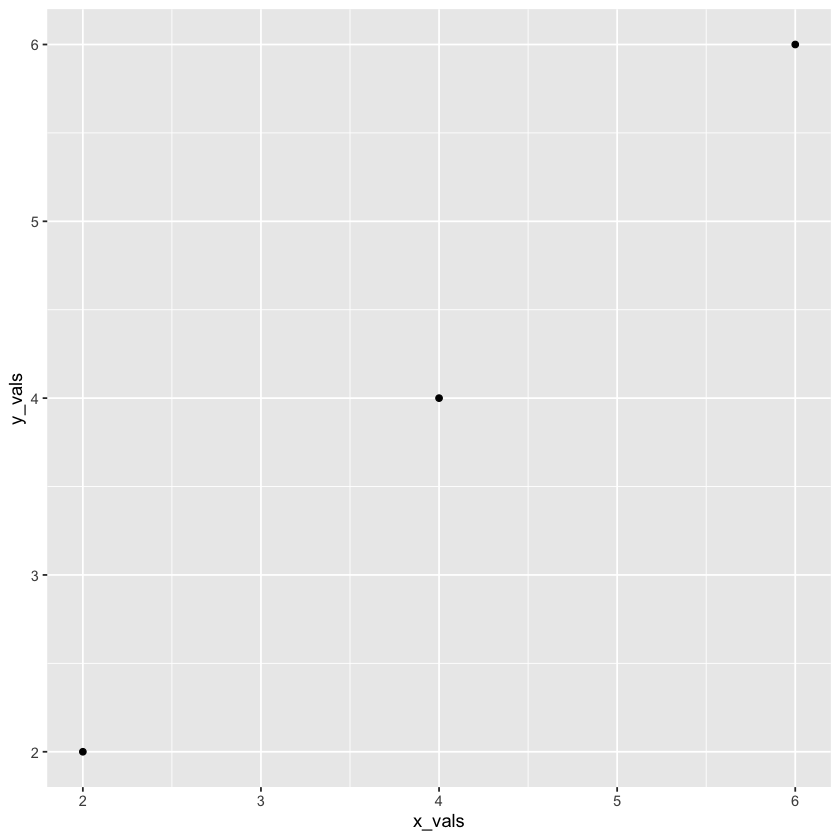

In [3]:
plot2d <- scatter2d(test_data, x_vals, y_vals)
plot2d

Can we find the an attribute that tells us it has a `geom_point` attribute?

In [4]:
plot2d$layers

[[1]]
geom_point: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 


In [5]:
plot2d$layers[[1]]$geom

<ggproto object: Class GeomPoint, Geom, gg>
    aesthetics: function
    default_aes: uneval
    draw_group: function
    draw_key: function
    draw_layer: function
    draw_panel: function
    extra_params: na.rm
    handle_na: function
    non_missing_aes: size shape colour
    optional_aes: 
    parameters: function
    required_aes: x y
    setup_data: function
    setup_params: function
    use_defaults: function
    super:  <ggproto object: Class Geom, gg>

In [6]:
plot2d$layers[[1]]$geom

<ggproto object: Class GeomPoint, Geom, gg>
    aesthetics: function
    default_aes: uneval
    draw_group: function
    draw_key: function
    draw_layer: function
    draw_panel: function
    extra_params: na.rm
    handle_na: function
    non_missing_aes: size shape colour
    optional_aes: 
    parameters: function
    required_aes: x y
    setup_data: function
    setup_params: function
    use_defaults: function
    super:  <ggproto object: Class Geom, gg>

In [7]:
class(plot2d$layers[[1]]$geom)

[1] "GeomPoint" "Geom"      "ggproto"   "gg"

Can we find the an attribute that tells us that the variables have been correctly mapped to the axes?

In [8]:
plot2d$mapping$x

<quosure>
expr: ^x_vals
env:  global

In [9]:
rlang::get_expr(plot2d$mapping$x)

x_vals

We could go through the same exercise for the y-axis

Great, now we know enough that can write some basic tests for our function. This function will need a plot to test on, so we need to create that first within our `test_that` chunk.

In [10]:
test_that('Plot should use geom_point and map x to x-axis, and y to y-axis.', {
    expect_true("GeomPoint" %in% c(class(plot2d$layers[[1]]$geom)))
    expect_true("x_vals"  == rlang::get_expr(plot2d$mapping$x))
    expect_true("y_vals" == rlang::get_expr(plot2d$mapping$y))
})

Test passed 🥇


### Other attributes you might want to test?

- Labels via `"Some label" == p$labels$x` for the x-axis, for example
- That a variable is mapped to colour via `a_variable == rlang::get_expr(p$colour)`, for example
- That the plot is facetted via `"FacetGrid" %in% class(rlang::get_expr(side_by_side_world$facet))`

### Example test for altair plots

Here's a function that creates a scatter plot:

```
def scatter(df, x_axis, y_axis):
    chart = alt.Chart(df).mark_line().encode(
        alt.X(x_axis + ':Q',
            scale=alt.Scale(zero=False),
              axis=alt.Axis(tickMinStep=1)
        ),
        y=y_axis
    )
    return chart
```

Here's some small data to test it on:

```
small_data = pd.DataFrame({
        'year': np.array([1901, 1902, 1903, 1904, 1905]),
        'measure' : np.array([25, 25, 50, 50, 100])
    })
small_data
```

Here's the plot:

```
small_scatter = scatter(small_data, 'year', 'measure')
small_scatter
```

```{figure} img/alt_chart.png
---
height: 500px
name: alt_chart.png
---
```

Here's a unit test for the `scatter` function:

```
def test_scatter():
    assert small_scatter.encoding.x.field == 'year', 'x_axis should be mapped to the x axis'
    assert small_scatter.encoding.y.field == 'measure', 'y_axis should be mapped to the y axis'
    assert small_scatter.mark == 'line', 'mark should be a line'
    assert small_scatter.encoding.x.scale.zero == False, "x-axis should not start at 0"
    assert small_scatter.encoding.x.axis.tickMinStep == 1, "x-axis small tick step should be 1"
```

### General guidelings for testing model objects

- **Reproducibly** create helper/test data that is simple and tractable, that you could use to perform your function's job by hand (ideally)

- Initial tests should be designed to test that models have expected attributes and results

- Only secondarily, may you want to compare to existing methods (rationale for this being second: what if their tests are wrong? Or worse, what if they don't have any!)

### But I have another type of object? How do I test it?

If you don't know where to start writing tests for the object you plan to use or return in your function, try the following:

- make such an object and interactively explore it

- look at other packages that have functions and return the same kind of object, what do they test for?

## How pytest works:

Let's explore the `convertempPy` package!

- https://github.com/ttimbers/convertempPy

## How pytest works:

To run all tests in an Python package that uses `pytest`, run the following from the command line with the working directory being set as the package's root directory:

```
poetry run pytest
```

> Note: because we are using Poetry to build our packages, we need to prefix the pytest command with `poetry run` so that the tests are run in our package's virtual environment.

This command runs a recursive search (downward from the directory where this command is run) for files that are prefixed with `test_*.py` or `*_test.py` files which are imported by their test package name. From these files, it will run the functions whose names are pre-fixed with `test`.

**Demonstration** of `pytest` (time permitted)

## How testthat works:

To run all tests in an R package that uses `testthat`, run the following from the R console with the working directory being set as the package's root directory:

```
devtools::test()
```

This command is a shortcut for `testthat::test_dir()`, and it runs all the files that live in `tests/testthat/` that start with `test`.

*Source: [R Packages, Chapter 10](https://r-pkgs.org/tests.html)*

### Organizing tests for your R package:

Let's explore the `convertempr` package!

- https://github.com/ttimbers/convertempr

### Organizing tests for your R package:

Tests are organised hierarchically: **expectations** are grouped into **tests** which are organised in **files**:

- An **expectation** is the atom of testing. It describes the expected result of a computation: Does it have the right value and right class? Does it produce error messages when it should? An expectation automates visual checking of results in the console. Expectations are functions that start with `expect_`.

- A **test** groups together multiple expectations to test the output from a simple function, a range of possibilities for a single parameter from a more complicated function, or tightly related functionality from across multiple functions. This is why they are sometimes called **unit** as they test one unit of functionality. A test is created with `test_that()`.

- A **file** groups together multiple related tests. Files are given a human readable name with `context()`.

*Source: [R Packages, Chapter 10](https://r-pkgs.org/tests.html)*

## Where are we headed next?

- What is code coverage, why is it important and how do we measure it?